# **Hierarchical Clustering in Unsupervised Learning**  

Hierarchical Clustering is an **unsupervised learning** algorithm that groups data points into clusters based on their similarity. Unlike **K-Means**, it does not require specifying the number of clusters in advance. Instead, it builds a hierarchy of clusters that can be cut at different levels to obtain varying numbers of clusters.

---

## **Types of Hierarchical Clustering**  
1. **Agglomerative (Bottom-Up Approach)**  
   - Start with each data point as its own cluster.
   - Iteratively merge the closest clusters.
   - Continue until only one cluster remains.
  
2. **Divisive (Top-Down Approach)**  
   - Start with all points in a single cluster.
   - Recursively split clusters until each point is its own cluster.
   - Less commonly used due to computational complexity.

**Agglomerative Hierarchical Clustering (AHC)** is more widely used, so we will focus on its working and mathematical intuition.

---

## **Working of Agglomerative Hierarchical Clustering**
1. **Compute Distance Matrix**  
   - Calculate the pairwise distances (usually **Euclidean distance**) between all data points.
  
2. **Merge Closest Clusters**  
   - Identify the two closest clusters and merge them into a single cluster.
  
3. **Update Distance Matrix**  
   - Recompute distances between the new cluster and the remaining clusters using a **linkage method** (explained below).

4. **Repeat Steps 2 & 3**  
   - Continue merging clusters until a single cluster remains.

5. **Dendrogram Construction**  
   - A **dendrogram** (tree diagram) is created to visualize how clusters were merged.
   - By cutting the dendrogram at a chosen level, different numbers of clusters can be formed.

---

## **Mathematical Intuition Behind Hierarchical Clustering**
Hierarchical clustering relies on **distance metrics** and **linkage criteria** to determine how clusters should be merged.

### **1. Distance Metrics**
The distance \( d(x_i, x_j) \) between data points \( x_i \) and \( x_j \) is commonly calculated using:
- **Euclidean Distance**:  
  \[
  d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}
  \]
- **Manhattan Distance**:  
  \[
  d(x_i, x_j) = \sum_{k=1}^{n} |x_{ik} - x_{jk}|
  \]

### **2. Linkage Methods (Cluster Distance Update)**
After merging two clusters, we must update the distance matrix. This is done using different **linkage methods**:

- **Single Linkage (Minimum Distance)**  
  \[
  d(C_a, C_b) = \min \{ d(x_i, x_j) : x_i \in C_a, x_j \in C_b \}
  \]
  - Sensitive to noise, may form elongated clusters.

- **Complete Linkage (Maximum Distance)**  
  \[
  d(C_a, C_b) = \max \{ d(x_i, x_j) : x_i \in C_a, x_j \in C_b \}
  \]
  - Ensures compact clusters.

- **Average Linkage (Mean Distance)**  
  \[
  d(C_a, C_b) = \frac{1}{|C_a||C_b|} \sum_{x_i \in C_a} \sum_{x_j \in C_b} d(x_i, x_j)
  \]
  - Balances between single and complete linkage.

- **Centroid Linkage (Mean of Cluster Centroids)**  
  \[
  d(C_a, C_b) = d(\mu_a, \mu_b), \quad \text{where} \quad \mu_a = \frac{1}{|C_a|} \sum_{x \in C_a} x
  \]
  - May lead to inversions in dendrograms.

- **Ward's Method (Minimizing Variance)**  
  - Tries to minimize the increase in total **intra-cluster variance**:

    \[
    d(C_a, C_b) = \sum_{x_i \in C} || x_i - \mu_C ||^2 - \left( \sum_{x_i \in C_a} || x_i - \mu_a ||^2 + \sum_{x_j \in C_b} || x_j - \mu_b ||^2 \right)
    \]
  - Results in compact, spherical clusters.

---

## **Choosing the Number of Clusters**
To decide how many clusters to keep:
- **Dendrogram**: Cut at a height where there is a large vertical jump.
- **Elbow Method on Distance Matrix**: Look for a sharp change in within-cluster variance.
- **Silhouette Score**: Evaluates cluster separation.

---

## **Advantages of Hierarchical Clustering**
✅ **No need to predefine K** (unlike K-Means).  
✅ **Dendrogram provides detailed insights** into data structure.  
✅ **Works well for small datasets** with meaningful cluster hierarchies.  

## **Limitations of Hierarchical Clustering**
❌ **Computationally expensive**: \( O(n^2) \) complexity due to distance calculations.  
❌ **Not scalable** for large datasets.  
❌ **Sensitive to outliers** and choice of linkage method.  

---

### **Comparison: K-Means vs. Hierarchical Clustering**
| Feature                | K-Means Clustering       | Hierarchical Clustering |
|------------------------|------------------------|-------------------------|
| **Input Required**      | K (Number of clusters) | No input required |
| **Scalability**        | Works for large datasets | Slow for large datasets |
| **Cluster Shape**      | Assumes spherical clusters | Works with different shapes |
| **Hierarchical Structure** | No | Yes |
| **Result Interpretation** | No dendrogram, less interpretable | Dendrogram helps interpret results |

Would you like a Python implementation of Hierarchical Clustering? 🚀


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn


In [2]:
from sklearn.datasets import load_iris
data=load_iris()

In [7]:
iris_data=pd.DataFrame(data.data)

In [8]:
iris_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris_data.columns=data.feature_names

In [10]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
iris_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [17]:
iris_data.duplicated().sum()

1

## feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(iris_data)

In [20]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [25]:
pca_scaled=pca.fit_transform(X_scaled)

In [26]:
pca_scaled


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

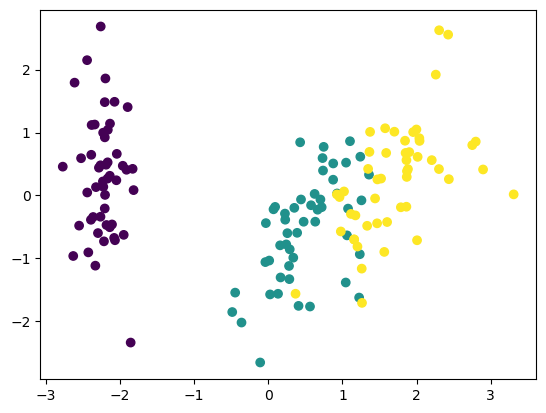

In [29]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=data.target)

In [30]:
## applying the aglomerative clustering.
## To Construct the Dindogram.
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Euclidean Distance')

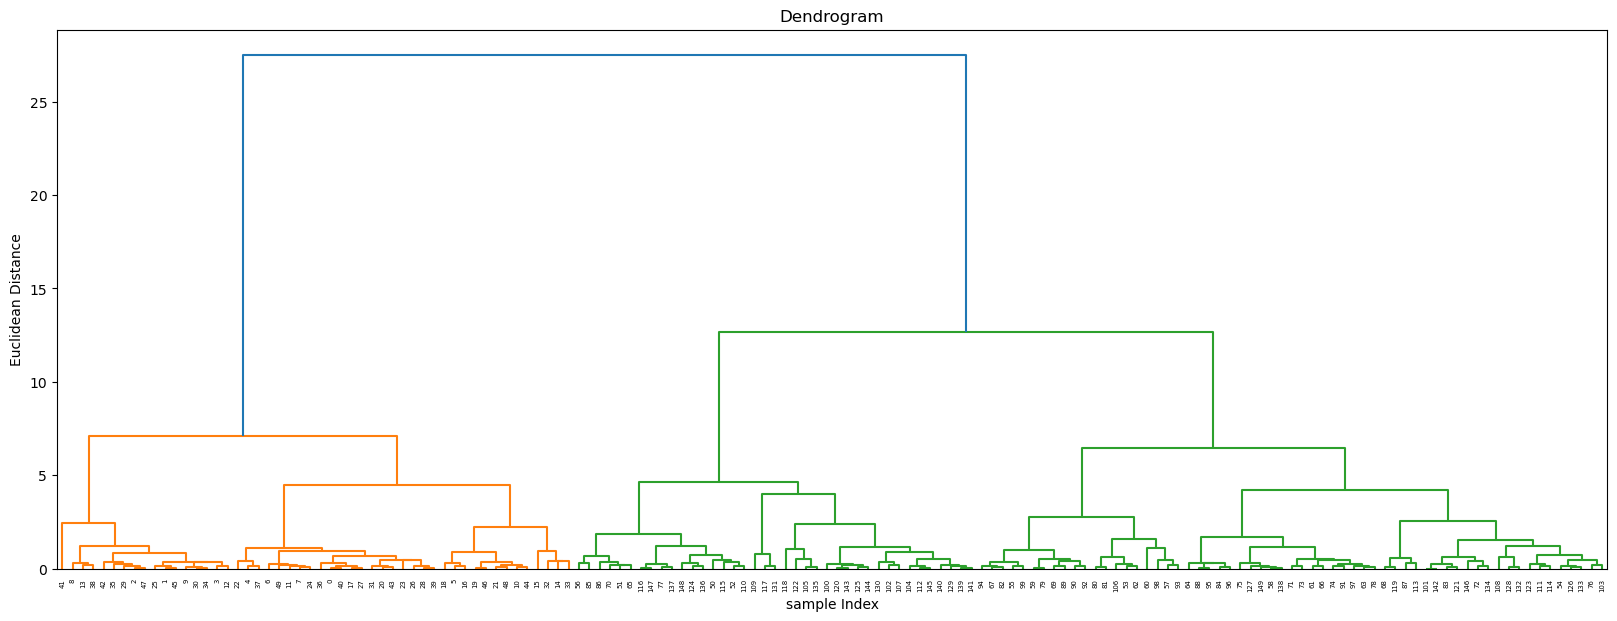

In [31]:
plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title("Dendrogram")
plt.xlabel("sample Index")
plt.ylabel("Euclidean Distance")

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [37]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

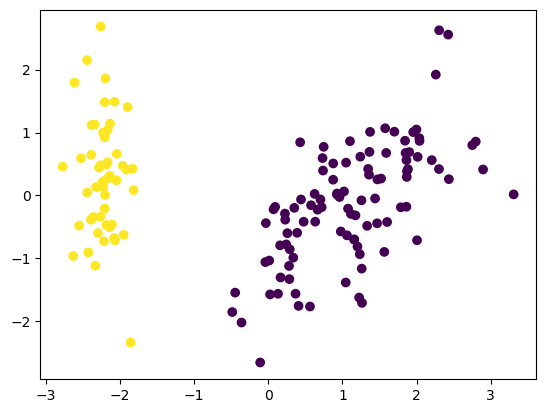

In [38]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)